### Images we will use (all from `skimage.data`)

* **camera** – classic grayscale scene (person + buildings) → edges, HOG.
* **checkerboard** – strong corners → Harris/FAST.
* **coins** – clean edges, varying contrast → Sobel/Canny, thresholding.
* **page** / **text** – thin strokes → Canny sensitivity, corner density.
* **brick**, **gravel**, **grass** – textures → HOG/LBP feel.
* **astronaut** / **rocket** / **chelsea** – natural images → gradients, HOG sanity-check.

### **How to use them**

* **Sobel / Scharr** → see edges on “Cameraman” or “House.”
* **Canny** → same images, but you’ll notice much cleaner, thinned edge maps.
* **Harris / FAST** → try “Chessboard” or “House”; you’ll see corners pop.
* **HOG** → “Pedestrian datasets” (INRIA person dataset) shows why HOG was famous.
* **SIFT / SURF / ORB** → use “Lena” or “Barbara,” then rotate/scale and check if keypoints still match.

In [1]:
import cv2 # OpenCV for image processing
import numpy as np # NumPy for numerical operations
from matplotlib import pyplot as plt # Matplotlib for plotting
from skimage import data    # scikit-image for sample images

Matplotlib is building the font cache; this may take a moment.


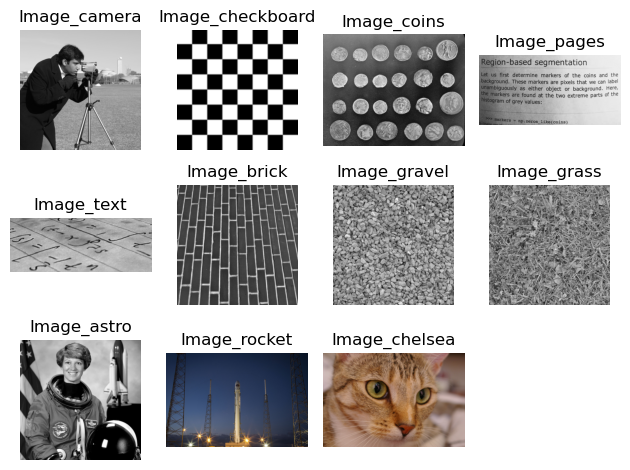

In [2]:
# put all in for loop   
images = [data.camera(),        # classic grayscale scene (person + buildings)
          data.checkerboard(),  # strong corners
          data.coins(),         # clean edges, varying contrast
          data.page(),          # thin strokes
          data.text(),          # thin strokes
          data.brick(),         # textures
          data.gravel(),        # textures
          data.grass(),         # textures
          cv2.cvtColor(data.astronaut(), cv2.COLOR_BGR2GRAY),  # natural image
          data.rocket(),       # natural image
          data.chelsea()]      # natural image

titles = ['Image_camera',               
          'Image_checkboard', 
          'Image_coins', 
          'Image_pages', 
          'Image_text', 
          'Image_brick', 
          'Image_gravel', 
          'Image_grass', 
          'Image_astro', 
          'Image_rocket', 
          'Image_chelsea']


# create dictionary to store above images with their names as keys
image_dict = {titles[i]: images[i] for i in range(len(images))}

for i in range(len(images)):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off') # Hide axisss
plt.tight_layout()
plt.show()

### Gradient ( 1st deriviative) filters
* Sobel
* Scharr
* Laplacian
* Canny
* Morphological Gradient (morphologyEx → MORPH\_GRADIENT)
* Laplacian of Gaussian (Gaussian blur + Laplacian)
* Gabor filter (getGaborKernel + filter2D)
* Structured Edge Detection (ximgproc)


neat progression — to see why each filter came after the previous one:

⸻
| Filter         | Kernel size | Derivative style             | Smoothing style           | Strengths                                 | Weaknesses                                   |
|----------------|-------------|------------------------------|---------------------------|-------------------------------------------|----------------------------------------------|
| Roberts Cross  | 2×2         | Diagonal difference (Gx, Gy) | None (no smoothing)       | Tiny, cheap, captures diagonal edges well | Extremely noise-sensitive, jagged edges      |
| Prewitt        | 3×3         | Central difference [-1,0,+1] | Uniform [1,1,1]           | Simple, easy to compute                   | Weak diagonals, poor noise suppression       |
| Sobel          | 3×3 (5×5, 7×7) | Central difference [-1,0,+1] | Gaussian-like [1,2,1]     | Better noise suppression, smoother edges  | Still anisotropic (bias to H/V edges)        |
| Scharr         | 3×3         | Central difference [-1,0,+1] | Tuned weights [3,10,3]    | Almost isotropic, better orientation accuracy | Limited to 3×3, slightly heavier than Sobel |
⸻

### key points
	•	Roberts: “The earliest, smallest edge detector — very noisy.”
	•	Prewitt: “Sobel’s predecessor — uniform smoothing, cheaper but weaker.”
	•	Sobel: “Most common — Pascal smoothing, robust enough.”
	•	Scharr: “Sobel refined — tuned for isotropy, better for orientation-sensitive tasks.”

⸻

Want me to add Laplacian / LoG / Canny into this same table so you have the second-order and multi-stage detectors lined up too?

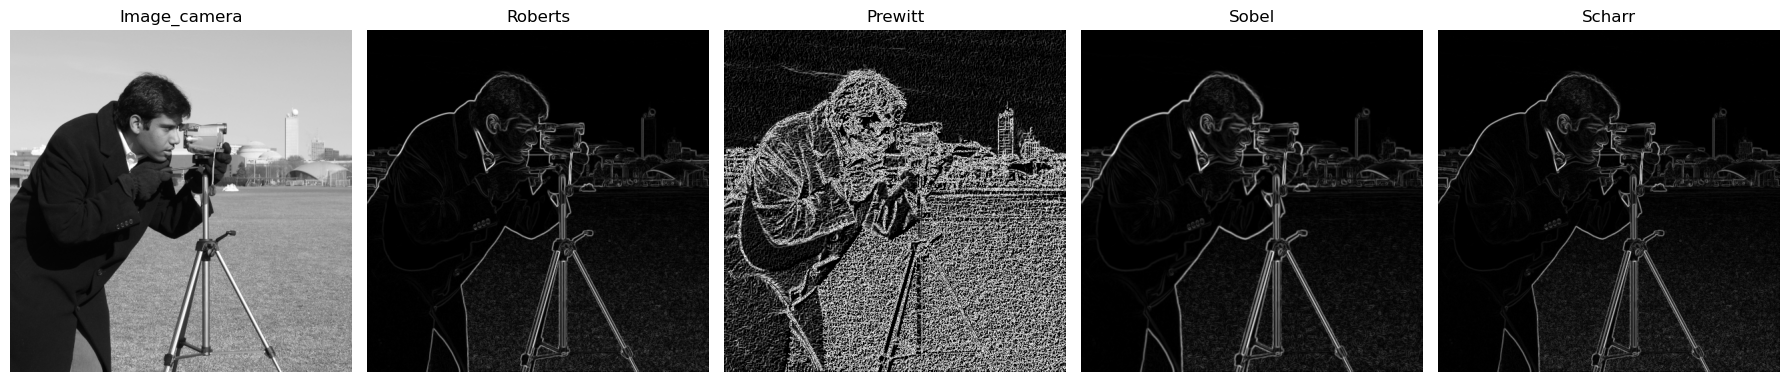

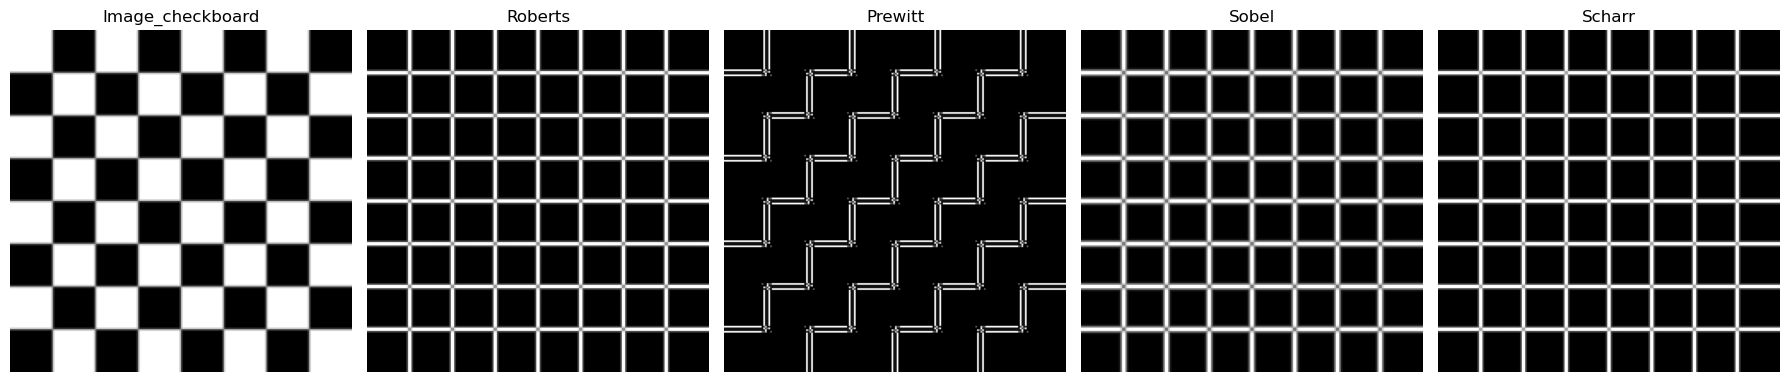

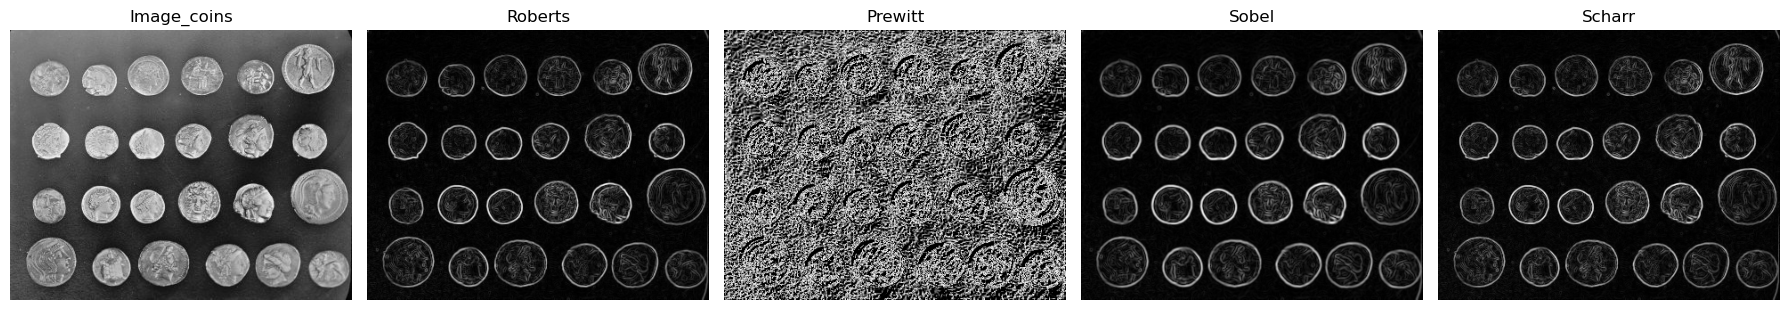

In [8]:
# Improved: Use image_dict, user can select images, and avoid subplot index errors
# Example: selected_images = ['Image_camera', 'Image_coins', 'Image_brick']
selected_images = ['Image_camera', 'Image_checkboard', 'Image_coins']  # <-- change as needed

for name in selected_images:
    image = image_dict[name]

    # Roberts (approximate with Sobel 3x3)
    roberts_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    roberts_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    roberts = np.sqrt(roberts_x**2 + roberts_y**2)

    # Prewitt
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    prewitt_x = cv2.filter2D(image, -1, kernelx)
    prewitt_y = cv2.filter2D(image, -1, kernely)
    prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)

    # Sobel
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)

    # Scharr
    scharr_x = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    scharr = np.sqrt(scharr_x**2 + scharr_y**2)

    plt.figure(figsize=(18, 4))
    plt.subplot(1, 5, 1)
    plt.imshow(image, cmap='gray')
    plt.title(name)
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(roberts, cmap='gray')
    plt.title('Roberts')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(prewitt, cmap='gray')
    plt.title('Prewitt')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(sobel, cmap='gray')
    plt.title('Sobel')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(scharr, cmap='gray')
    plt.title('Scharr')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

| Filter | Camera | Checkerboard | Coins | Takeaways |
| :--- | :--- | :--- | :--- | :--- |
| **Roberts** | picks edges but looks thin, noisy, diagonal emphasis. | detects borders but with very fine, thin lines. | outlines coins well, but very thin and weak detail inside. | smallest, but too noise sensitive. |
| **Prewitt** | stronger response everywhere, but also grainy → lots of noise. | staircase-like artifacts — you can see jagged diagonal patterns. | strong but very noisy texture inside coins. | works, but artifacts and noise. |
| **Sobel** | edges are cleaner, background noise suppressed. | clean, uniform grid edges. | clear coin boundaries, decent interior detail. | robust default, balances derivative and smoothing. |
| **Scharr** | very close to Sobel, but edges (like tripod legs) look slightly sharper, diagonals balanced. | also clean, with more uniform brightness across edge directions (isotropy effect). | boundaries similar to Sobel, but gradients on coin faces look more even, diagonals balanced. | best isotropy, sharper diagonals, often chosen when gradient direction accuracy matters (HOG, optical flow). |

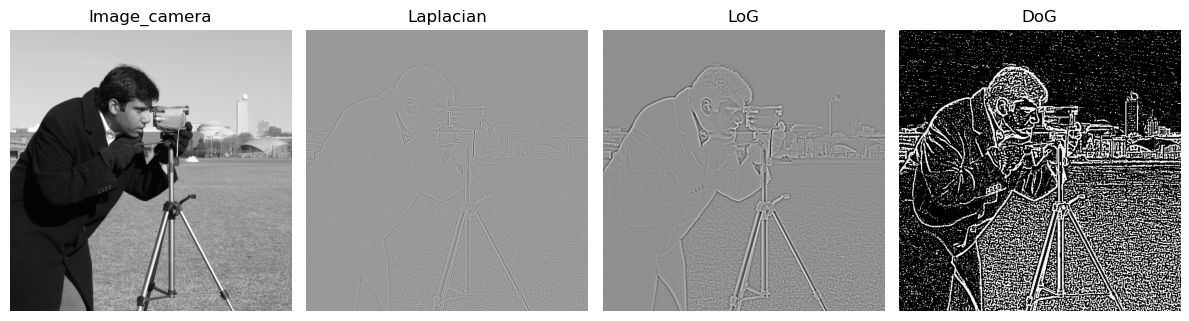

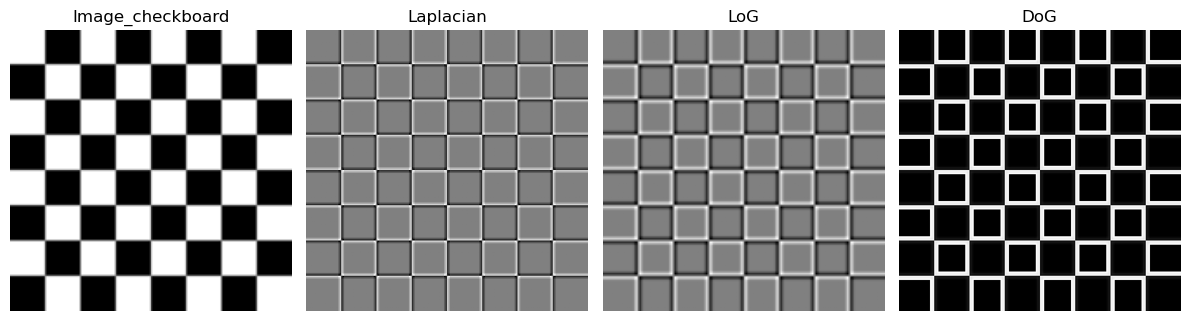

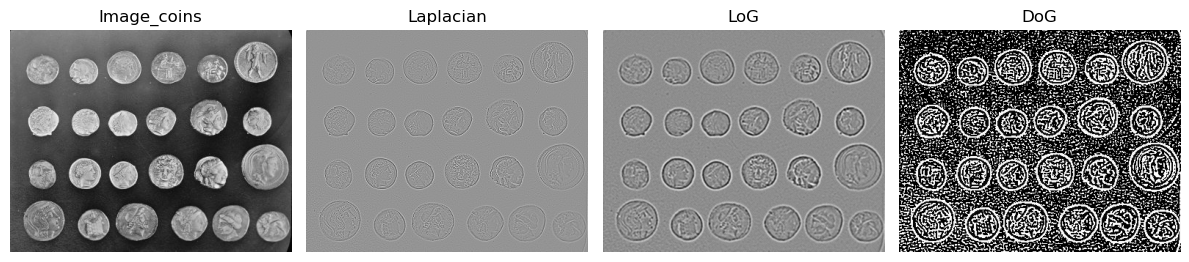

In [ ]:
# Improved: Use image_dict, user can select images, and avoid subplot index errors
# Example: selected_images = ['Image_camera', 'Image_coins', 'Image_brick']
selected_images = ['Image_camera', 'Image_checkboard','Image_coins']  # <-- change as needed

for name in selected_images:
    image = image_dict[name]

    # Laplacian
    laplacian = cv2.Laplacian(image, cv2.CV_64F)

    # LoG. Laplacian of Gaussian
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    log = cv2.Laplacian(blurred, cv2.CV_64F)

    # DoG Difference of Gaussian
    gaussian1 = cv2.GaussianBlur(image, (5, 5), 1)
    gaussian2 = cv2.GaussianBlur(image, (5, 5), 2)
    dog = gaussian1 - gaussian2

    plt.figure(figsize=(12, 9))
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title(name)
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplacian')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(log, cmap='gray')
    plt.title('LoG')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(dog, cmap='gray')
    plt.title('DoG')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

I can't generate the Jupyter notebook file directly, but I can provide the markdown tables you requested. Here are the two tables, which you can easily copy and paste into a Jupyter notebook cell.

| Filter | Kernel style | Principle | Behavior (from your images) | Strengths | Weaknesses |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Laplacian** | 3x3 (4- or 8-neighbor) | Sum of 2nd derivatives in x & y | Thin, delicate edges, double-line look, lots of faint detail | Simple, isotropic, precise contours | Very noise-sensitive, no smoothing |
| **LoG** (Laplacian of Gaussian) | 5x5 or larger (Gaussian + Laplacian) | Smooth with Gaussian, then Laplacian | Softer, beveled edges; noise reduced; edges cleaner | Robust, balances noise vs edge localization | Blurs fine detail, heavier kernel |
| **DoG** (Difference of Gaussians) | Two Gaussian blurs (σ₁, σ₂), subtract | Approximation of LoG | Strong outlines, sharp contrast, more speckle | Cheaper than LoG, tunable scale, great for feature detection (e.g., SIFT) | Noisy for plain edge maps, approximate |

***

| Filter | Order | Kernel size | Principle | Strengths | Weaknesses |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Roberts** | 1st | 2x2 | Diagonal differences (∂/∂x, ∂/∂y) | Tiny, simple, catches diagonals | Extremely noise-sensitive, no smoothing |
| **Prewitt** | 1st | 3x3 | Central diff + uniform smoothing | Simple, easy to compute | Weak diagonals, poor noise suppression |
| **Sobel** | 1st | 3x3 (extends to 5x5, 7x7) | Central diff + Gaussian-like smoothing ([1,2,1]) | Robust, balances derivative & noise suppression | Slight bias toward H/V edges |
| **Scharr** | 1st | 3x3 | Central diff + tuned weights ([3,10,3]) | Best isotropy, accurate orientation | Only standard for 3x3, slightly heavier |
| **Laplacian** | 2nd | 3x3 | Second derivative, zero-crossings | Thin, isotropic contours | Noisy, no smoothing |
| **LoG** | 2nd | 5x5+ | Gaussian smoothing + Laplacian | Clean edges, reduced noise | Blurs fine details, costlier |
| **DoG** | 2nd | Variable (depends on σ) | Difference of Gaussian blurs | Efficient LoG approximation, scale-tunable | Speckle noise, approximate |

| Filter | Kernel X ($\partial/\partial x$) | Kernel Y ($\partial/\partial y$) | Notes |
| :--- | :--- | :--- | :--- |
| **Roberts Cross (2x2)** | $$\begin{bmatrix} +1 & 0 \\ 0 & -1 \end{bmatrix}$$ | $$\begin{bmatrix} 0 & +1 \\ -1 & 0 \end{bmatrix}$$ | Oldest, diagonal differences |
| **Prewitt (3x3)** | $$\begin{bmatrix} -1 & 0 & +1 \\ -1 & 0 & +1 \\ -1 & 0 & +1 \end{bmatrix}$$ | $$\begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ +1 & +1 & +1 \end{bmatrix}$$ | Uniform smoothing |
| **Sobel (3x3)** | $$\begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix}$$ | $$\begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ +1 & +2 & +1 \end{bmatrix}$$ | Uses [1,2,1] smoothing (Pascal row) |
| **Scharr (3x3)** | $$\begin{bmatrix} -3 & 0 & +3 \\ -10 & 0 & +10 \\ -3 & 0 & +3 \end{bmatrix}$$ | $$\begin{bmatrix} -3 & -10 & -3 \\ 0 & 0 & 0 \\ +3 & +10 & +3 \end{bmatrix}$$ | Tuned [3,10,3] weights for isotropy |
| **Laplacian (4-neighbor)** | $$\begin{bmatrix} 0 & -1 & 0 \\ -1 & +4 & -1 \\ 0 & -1 & 0 \end{bmatrix}$$ | — | Only one kernel (isotropic 2nd derivative) |
| **Laplacian (8-neighbor)** | $$\begin{bmatrix} -1 & -1 & -1 \\ -1 & +8 & -1 \\ -1 & -1 & -1 \end{bmatrix}$$ | — | Includes diagonals |
| **LoG (5x5, $\sigma \approx 1$)** | Example: $$\begin{bmatrix} 0 & 0 & -1 & 0 & 0 \\ 0 & -1 & -2 & -1 & 0 \\ -1 & -2 & 16 & -2 & -1 \\ 0 & -1 & -2 & -1 & 0 \\ 0 & 0 & -1 & 0 & 0 \end{bmatrix}$$ | — | "Mexican hat" shape; size depends on $\sigma$ |
| **DoG** | Not a fixed kernel — computed as $G(\sigma_1) - G(\sigma_2)$ | — | Approximates LoG, scale-dependent |

***

### Summary of Edge Detector Families

* **First-Order (Gradient) Filters**
    These filters, including **Roberts, Prewitt, Sobel, and Scharr**, use the first derivative to detect sharp changes in pixel intensity. They find edges by calculating the **gradient magnitude** and direction.

* **Second-Order (Curvature) Filters**
    These filters, such as the **Laplacian, LoG, and DoG**, use the second derivative. They detect edges by identifying **zero-crossings** in the second derivative, which correspond to points of maximum change in the first derivative. They are often more sensitive to noise than first-order filters, but can provide thinner, more precise contours.

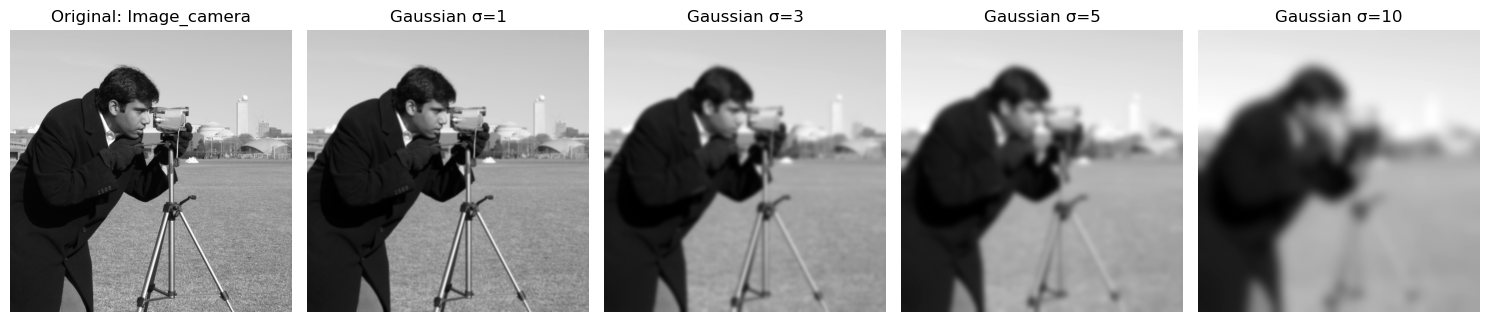

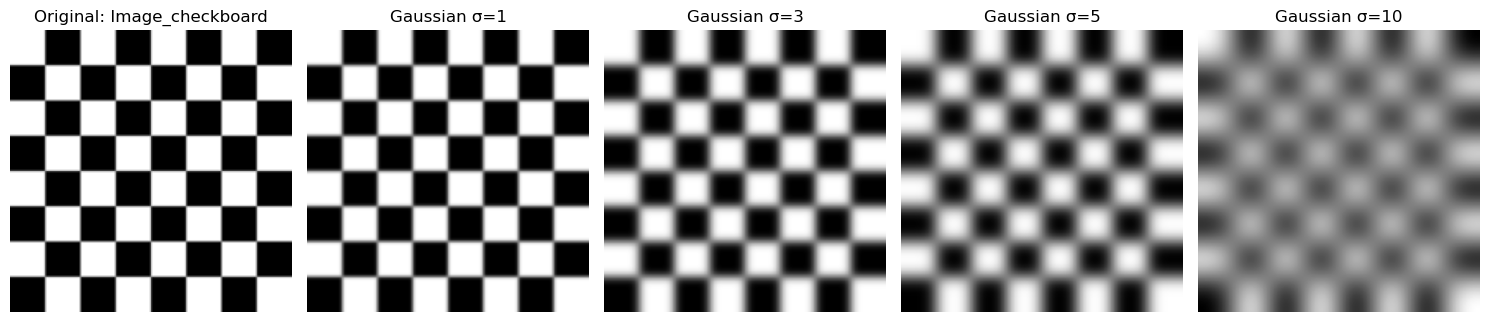

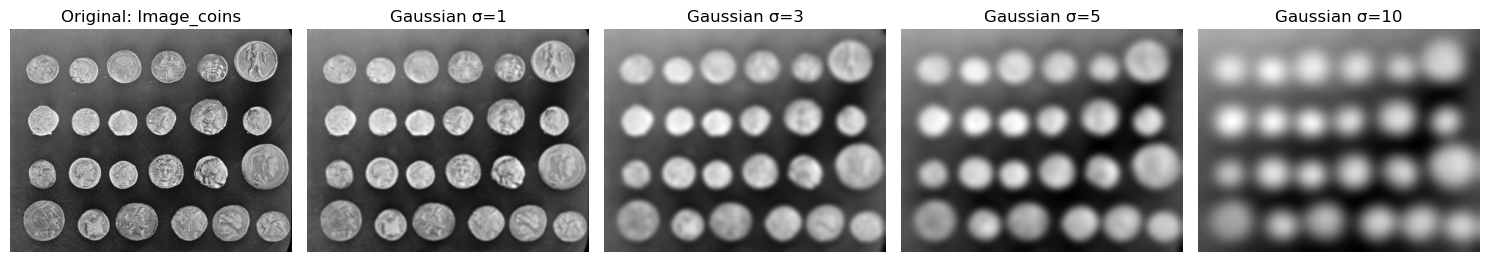

In [11]:
# how different sigma values in Gaussian blurring affect the image 
# Example: selected_images = ['Image_camera', 'Image_coins', 'Image_brick']
selected_images = ['Image_camera', 'Image_checkboard', 'Image_coins']  # <-- change as needed   

for name in selected_images:
    image = image_dict[name]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 5, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Original: {name}')
    plt.axis('off')

    sigmas = [1, 3, 5, 10]
    for i, sigma in enumerate(sigmas):
        blurred = cv2.GaussianBlur(image, (0, 0), sigma)
        plt.subplot(1, 5, i + 2)
        plt.imshow(blurred, cmap='gray')
        plt.title(f'Gaussian σ={sigma}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


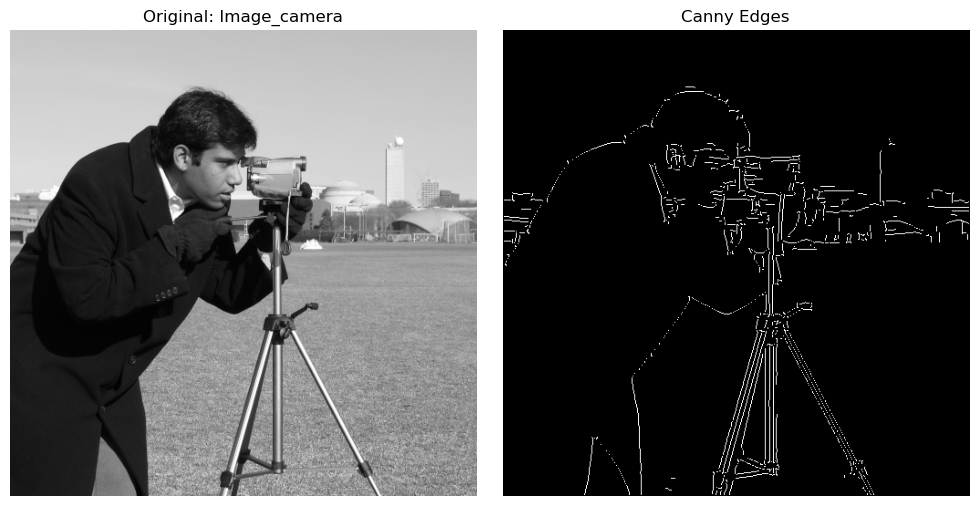

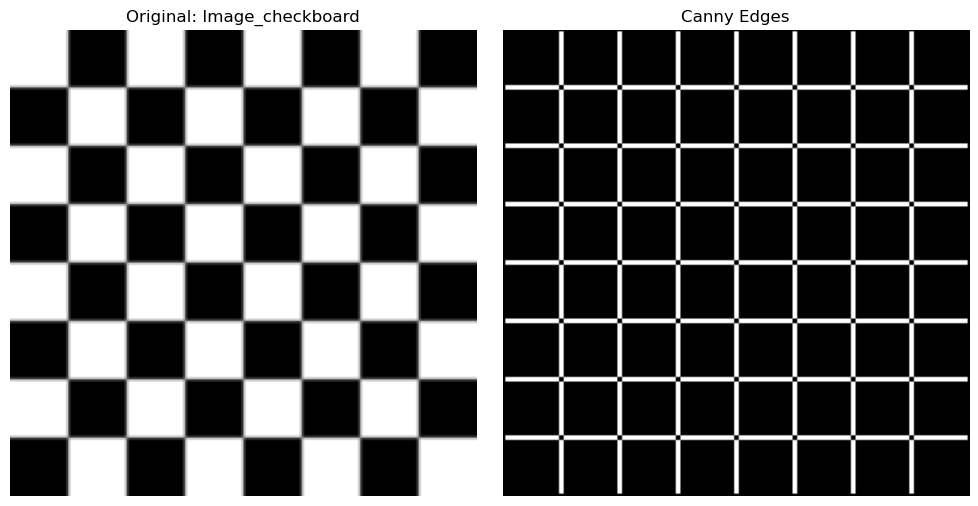

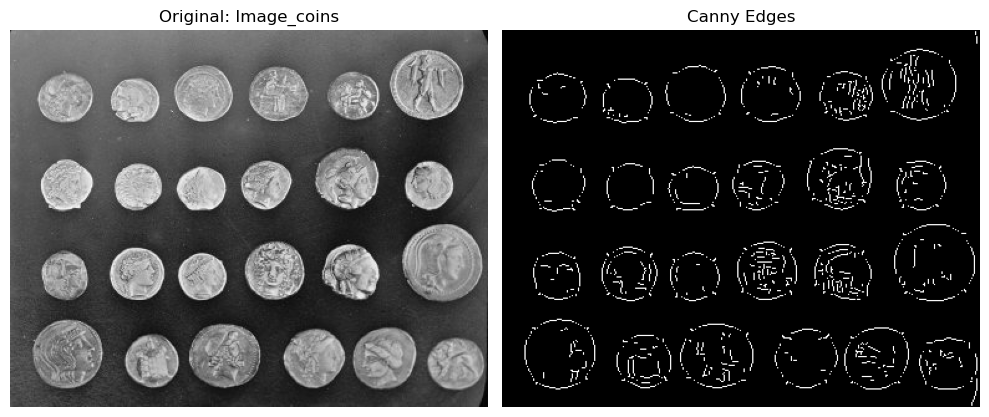

In [20]:
# now lets look at canny edge detector with different stages of its operation

# stage 1 gaussian blurring to reduce noise


# stage 2 gradient calculation using sobel operator

# stage 3 non-maximum suppression to thin edges

# stage 4 double thresholding to identify strong, weak, and non-relevant pixels

# stage 5 edge tracking by hysteresis to finalize edges by suppressing weak edges not connected to strong edges

# Example: selected_images = ['Image_camera', 'Image_coins', 'Image_brick']
selected_images = ['Image_camera', 'Image_checkboard', 'Image_coins']  # <-- change as needed

for name in selected_images:
    image = image_dict[name]  # original image astype(np.float32) / 255.0

    # stage 1 Gaussian Blurring
    blurred = cv2.GaussianBlur(image, (5, 5), 1.4) 
    # stage 2 Gradient Calculation using Sobel
    grad_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=5)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    gradient_direction = np.arctan2(grad_y, grad_x) * (180 / np.pi) % 180   
    # stage 3 Non-Maximum Suppression
    nms = np.zeros_like(gradient_magnitude)
    angle = gradient_direction / 45.0
    angle = np.round(angle) % 4 # 0, 1, 2, 3 corresponding to 0, 45, 90, 135 degrees  

    # NMS implementation  
    for i in range(1, image.shape[0]-1):  # avoid border pixels
        for j in range(1, image.shape[1]-1): # avoid border pixels
            try:
                q = 255     # Initialize to max value
                r = 255     # Initialize to max value
                # angle 0   
                if angle[i,j] == 0:                     
                    q = gradient_magnitude[i, j+1]      
                    r = gradient_magnitude[i, j-1]
                # angle 45
                elif angle[i,j] == 1:
                    q = gradient_magnitude[i+1, j-1]
                    r = gradient_magnitude[i-1, j+1]
                # angle 90
                elif angle[i,j] == 2:
                    q = gradient_magnitude[i+1, j]
                    r = gradient_magnitude[i-1, j]
                # angle 135
                elif angle[i,j] == 3:
                    q = gradient_magnitude[i-1, j-1]
                    r = gradient_magnitude[i+1, j+1]

                if (gradient_magnitude[i,j] >= q) and (gradient_magnitude[i,j] >= r):           # keep pixel    
                    nms[i,j] = gradient_magnitude[i,j]                                          # keep pixel
                else:                                                     # suppress pixel      
                    nms[i,j] = 0                                          # suppress pixel

            except IndexError as e:                                       # ignore border
                pass                                                      # ignore border

    # stage 4 Double Thresholding
    highThreshold = nms.max() * 0.2
    lowThreshold = highThreshold * 0.5
    res = np.zeros_like(nms)
    strong = np.int32(255)
    weak = np.int32(75) 
    strong_i, strong_j = np.where(nms >= highThreshold)  # strong pixels
    zeros_i, zeros_j = np.where(nms < lowThreshold)      # non-relevant pixels
    weak_i, weak_j = np.where((nms <= highThreshold) & (nms >= lowThreshold)) # weak pixels
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak  
    res[zeros_i, zeros_j] = 0
    
    # stage 5 Edge Tracking by Hysteresis
    for i in range(1, res.shape[0]-1):  # avoid border pixels
        for j in range(1, res.shape[1]-1): # avoid border pixels
            if (res[i,j] == weak):  # if weak pixel
                try:
                    if ((res[i+1, j-1] == strong) or (res[i+1, j] == strong) or (res[i+1, j+1] == strong)
                        or (res[i, j-1] == strong) or (res[i, j+1] == strong)
                        or (res[i-1, j-1] == strong) or (res[i-1, j] == strong) or (res[i-1, j+1] == strong)):
                        res[i, j] = strong  # promote to strong
                    else:
                        res[i, j] = 0     # suppress to non-relevant
                except IndexError as e:   # ignore border
                    pass                  # ignore border
    
    canny_edges = res

    # show orginial image and canny edges
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Original: {name}')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(canny_edges, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


    



